# **Actividad 5: Uso de software para búsqueda.**

**Nombre:** Edwin Osbaldo Sanchez Guzman. **Matricula:** 1966611. **Carrera:** IMTC. **Hora:** N4

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Cargar el conjunto de datos MNIST
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [5]:
# Normalizar los datos
train_data = train_data / 255.0
test_data = test_data / 255.0

In [6]:
# Definir el modelo de red neuronal prealimentada
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Capa de entrada
    tf.keras.layers.Dense(128, activation='relu'),  # Capa oculta con activación ReLU
    tf.keras.layers.Dense(64, activation='relu'),   # Otra capa oculta con activación ReLU
    tf.keras.layers.Dense(10, activation='softmax') # Capa de salida con activación softmax
])

In [7]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Entrenar el modelo
model.fit(train_data, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2467 - accuracy: 0.9268
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1049 - accuracy: 0.9688
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0728 - accuracy: 0.9770
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0546 - accuracy: 0.9825
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0421 - accuracy: 0.9865


In [9]:
# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print("Exactitud de predicción en el conjunto de datos de prueba:", test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0911 - accuracy: 0.9712
Exactitud de predicción en el conjunto de datos de prueba: 0.9711999893188477


In [10]:
#5 predicciones
predictions = model.predict(test_data[:5])

1/1 [==============================] - 0s 73ms/step


In [11]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = tf.argmax(predictions_array).numpy()
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("Predicción:{}  Valor real:{}".format(predicted_label, true_label), color=color)

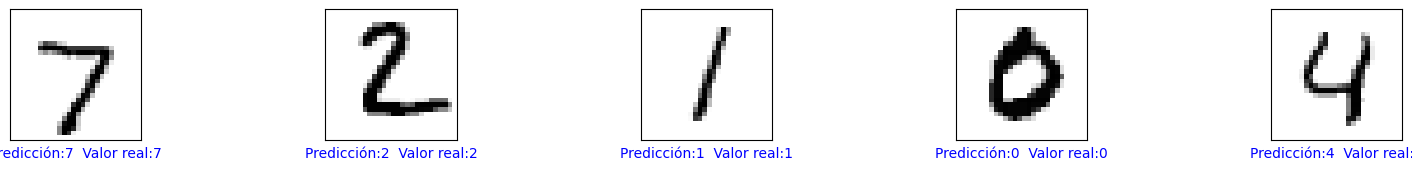

In [12]:
# Mostrar las imágenes y las predicciones
num_rows = 1
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_data)
plt.show()